In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [18]:
def load_mnist_data():
    train_data = datasets.MNIST(root='./dataset/mnist/', train=True, download=True)
    test_data = datasets.MNIST(root='./dataset/mnist/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading MNIST train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading MNIST test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [19]:
X_train, y_train, X_val, y_val = load_mnist_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Loading MNIST test data: 100%|█████████████████████████████| 10000/10000 [00:00<00:00, 21689.98it/s]


Number of training samples: 60000 
Number of test samples: 10000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Test Class Distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [20]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=392
entrySize=784
input_addr_length=2


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:16<00:00, 590.59it/s]


Accuracy:   0.09
Total Training Execution Time: 74.02 seconds


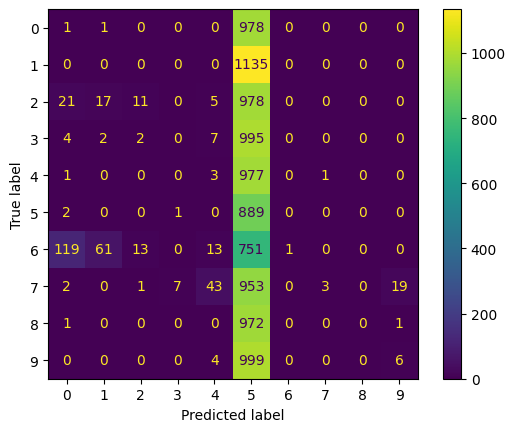

num_of_htables=196
entrySize=784
input_addr_length=4


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:10<00:00, 994.22it/s]


Accuracy:   0.16
Total Training Execution Time: 45.89 seconds


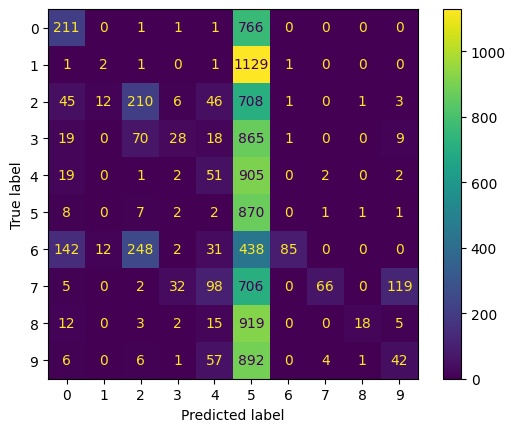

num_of_htables=130
entrySize=784
input_addr_length=6


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1261.51it/s]


Accuracy:   0.32
Total Training Execution Time: 37.20 seconds


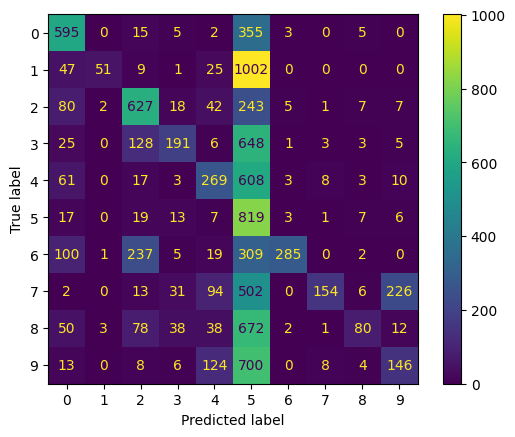

num_of_htables=98
entrySize=784
input_addr_length=8


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1422.83it/s]


Accuracy:   0.59
Total Training Execution Time: 33.54 seconds


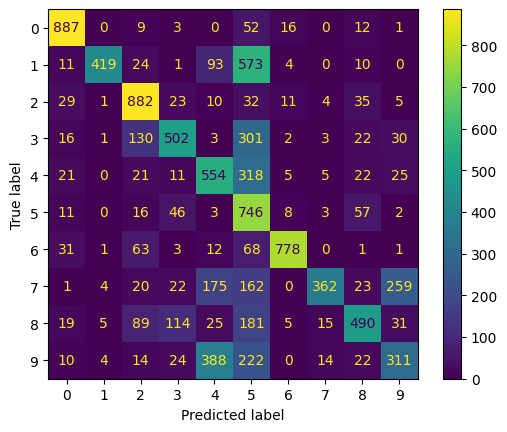

num_of_htables=78
entrySize=784
input_addr_length=10


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1565.68it/s]


Accuracy:   0.71
Total Training Execution Time: 30.42 seconds


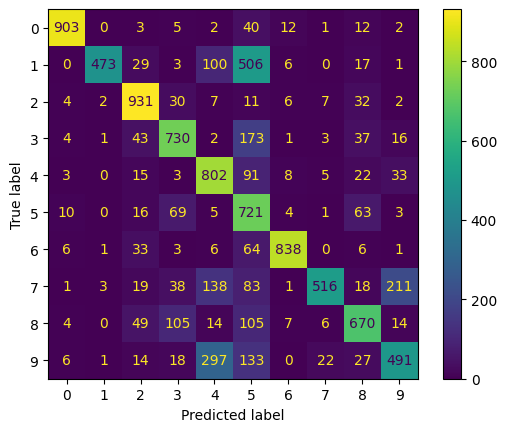

num_of_htables=65
entrySize=784
input_addr_length=12


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1620.96it/s]


Accuracy:   0.76
Total Training Execution Time: 29.82 seconds


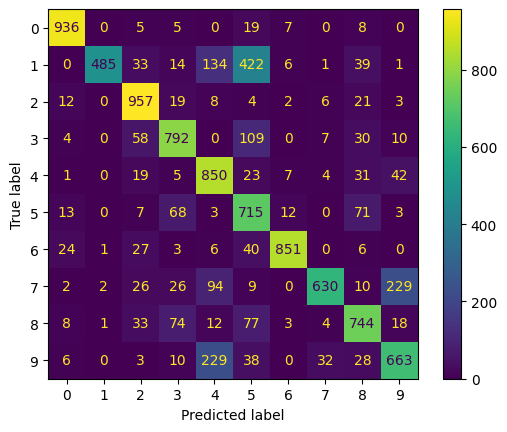

num_of_htables=56
entrySize=784
input_addr_length=14


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1676.56it/s]


Accuracy:   0.84
Total Training Execution Time: 28.98 seconds


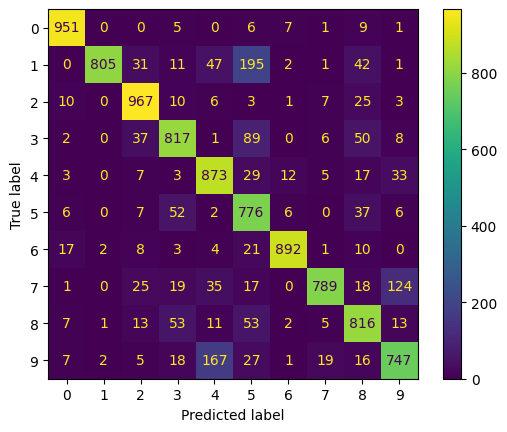

num_of_htables=49
entrySize=784
input_addr_length=16


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1720.30it/s]


Accuracy:   0.89
Total Training Execution Time: 28.38 seconds


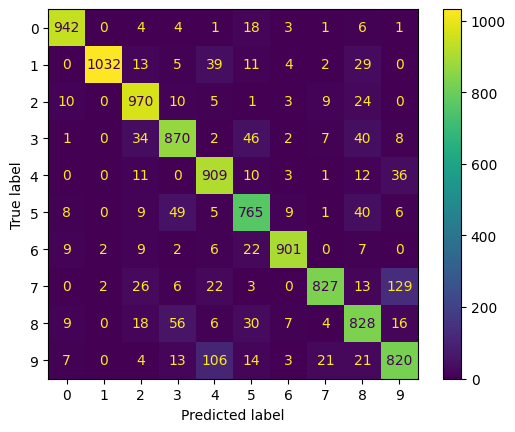

num_of_htables=43
entrySize=784
input_addr_length=18


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1758.34it/s]


Accuracy:   0.90
Total Training Execution Time: 27.79 seconds


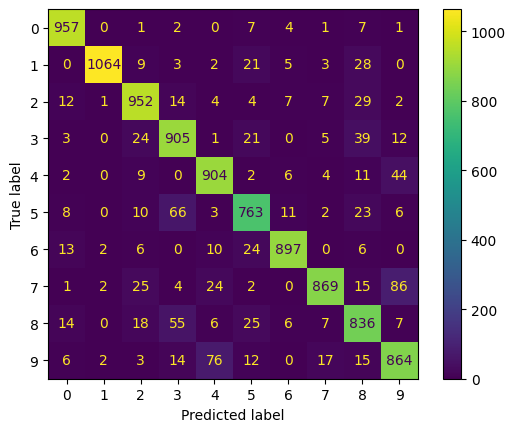

num_of_htables=39
entrySize=784
input_addr_length=20


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1789.08it/s]


Accuracy:   0.91
Total Training Execution Time: 27.68 seconds


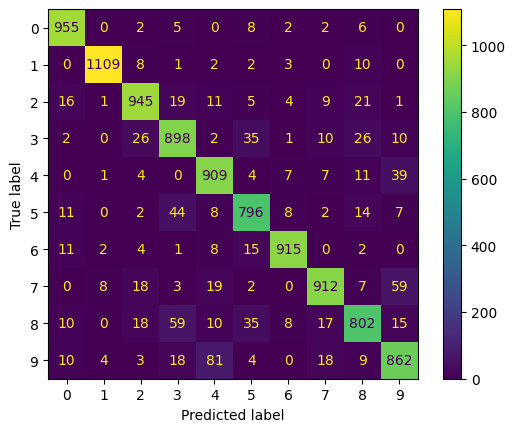

num_of_htables=35
entrySize=784
input_addr_length=22


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1804.89it/s]


Accuracy:   0.90
Total Training Execution Time: 27.80 seconds


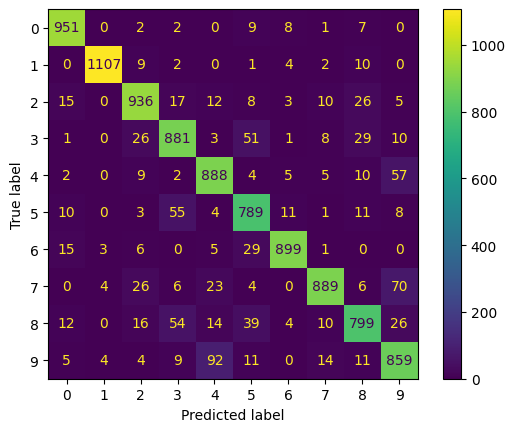

num_of_htables=32
entrySize=784
input_addr_length=24


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1844.32it/s]


Accuracy:   0.90
Total Training Execution Time: 27.47 seconds


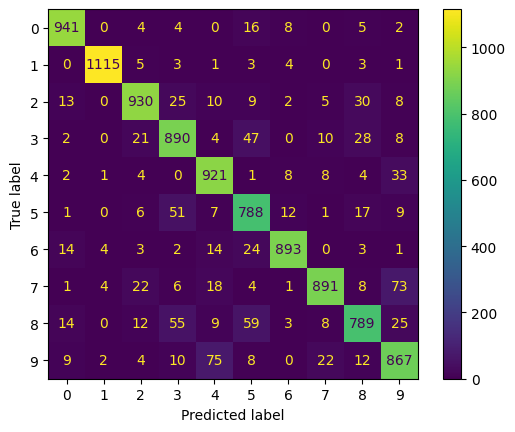

num_of_htables=30
entrySize=784
input_addr_length=26


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1808.70it/s]


Accuracy:   0.89
Total Training Execution Time: 27.82 seconds


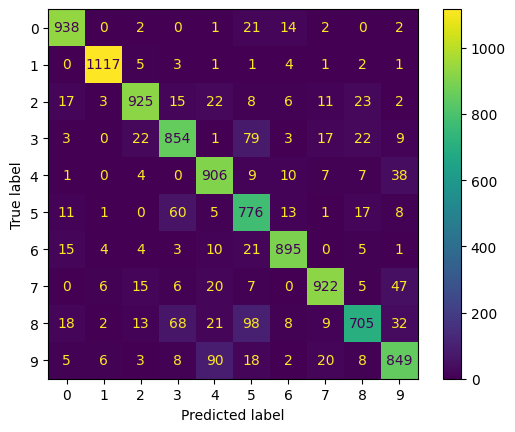

num_of_htables=28
entrySize=784
input_addr_length=28


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1849.89it/s]


Accuracy:   0.88
Total Training Execution Time: 27.79 seconds


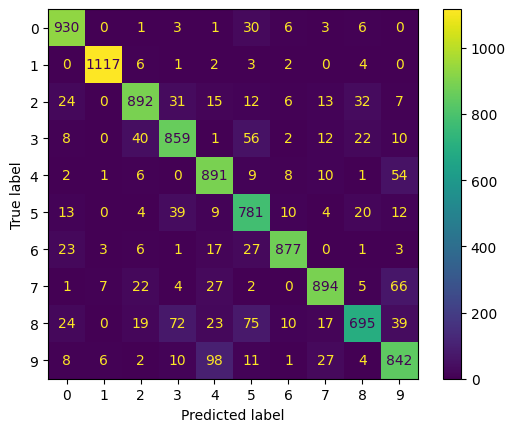

num_of_htables=26
entrySize=784
input_addr_length=30


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1895.68it/s]


Accuracy:   0.86
Total Training Execution Time: 27.39 seconds


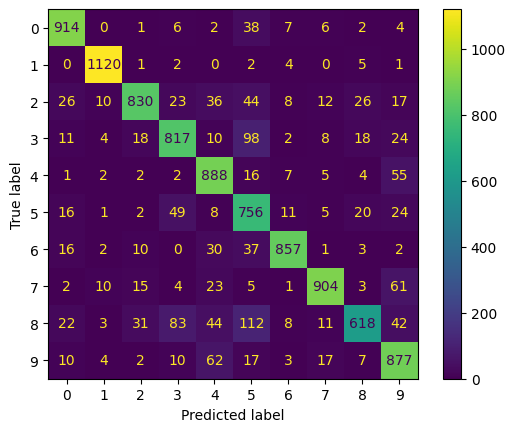

num_of_htables=24
entrySize=784
input_addr_length=32


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1934.32it/s]


Accuracy:   0.83
Total Training Execution Time: 27.05 seconds


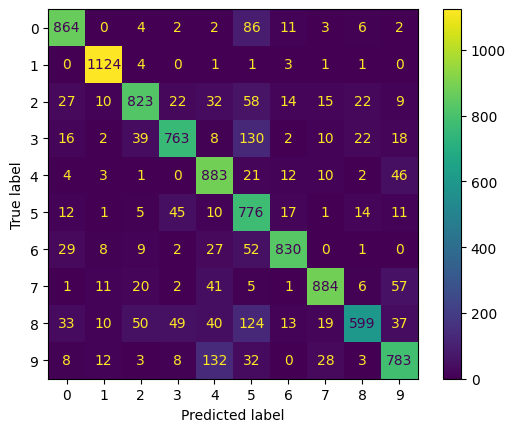

num_of_htables=23
entrySize=784
input_addr_length=34


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1917.56it/s]


Accuracy:   0.81
Total Training Execution Time: 27.73 seconds


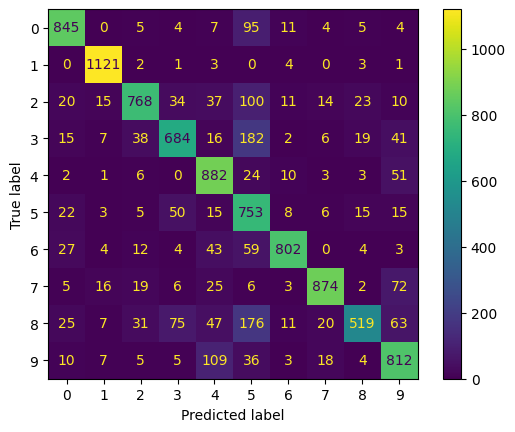

num_of_htables=21
entrySize=784
input_addr_length=36


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1985.53it/s]


Accuracy:   0.75
Total Training Execution Time: 26.71 seconds


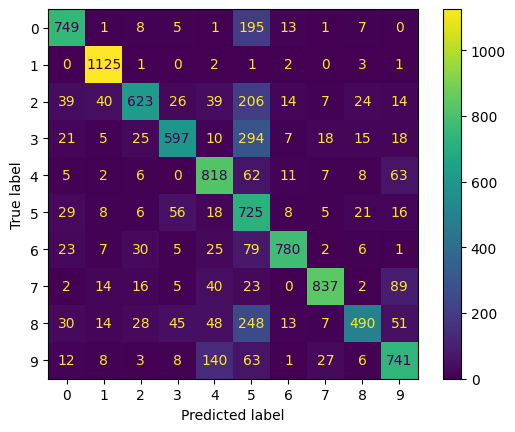

num_of_htables=20
entrySize=784
input_addr_length=38


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1999.45it/s]


Accuracy:   0.69
Total Training Execution Time: 26.66 seconds


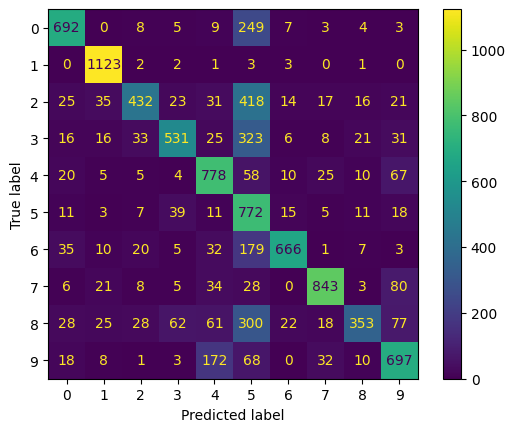

num_of_htables=19
entrySize=784
input_addr_length=40


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2015.81it/s]


Accuracy:   0.61
Total Training Execution Time: 26.61 seconds


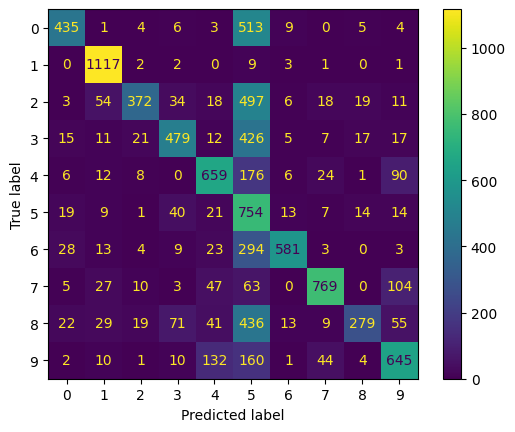

num_of_htables=18
entrySize=784
input_addr_length=42


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2018.36it/s]


Accuracy:   0.55
Total Training Execution Time: 26.65 seconds


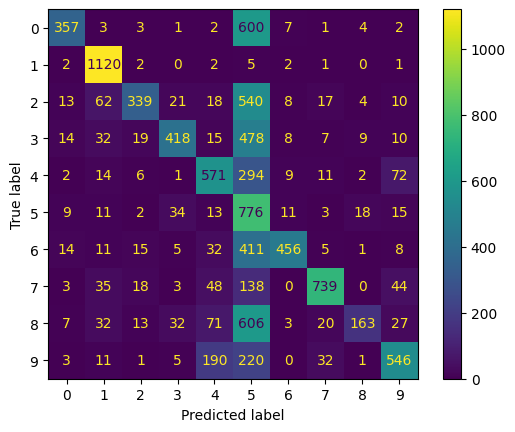

num_of_htables=17
entrySize=784
input_addr_length=44


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2056.90it/s]


Accuracy:   0.51
Total Training Execution Time: 26.43 seconds


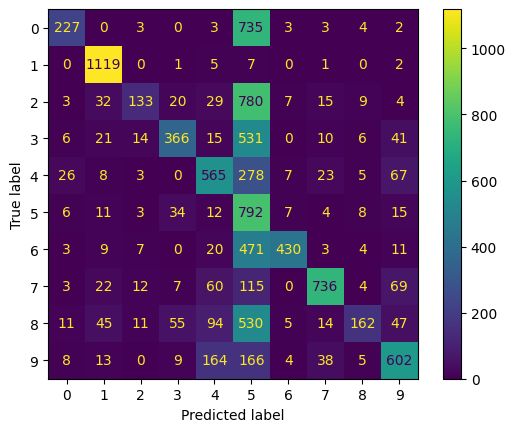

num_of_htables=17
entrySize=784
input_addr_length=46


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2013.99it/s]


Accuracy:   0.51
Total Training Execution Time: 27.19 seconds


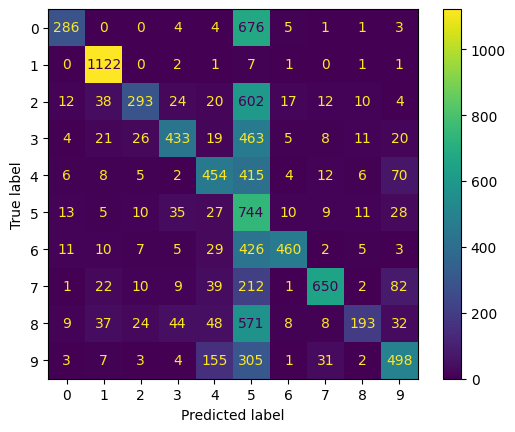

num_of_htables=16
entrySize=784
input_addr_length=48


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1996.19it/s]


Accuracy:   0.41
Total Training Execution Time: 27.11 seconds


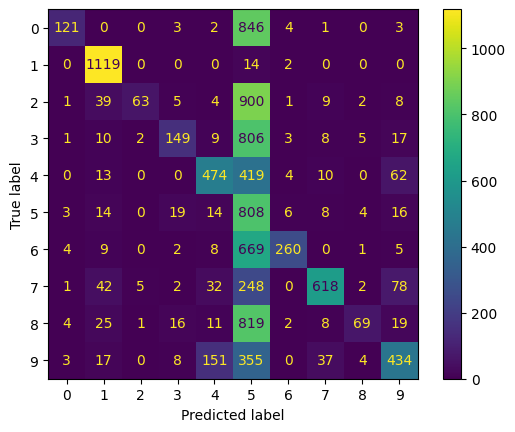

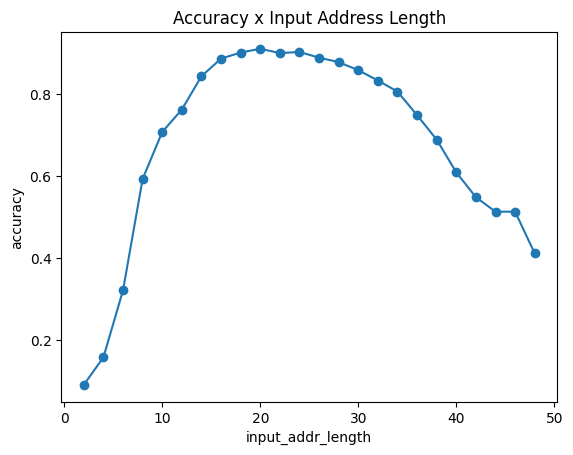

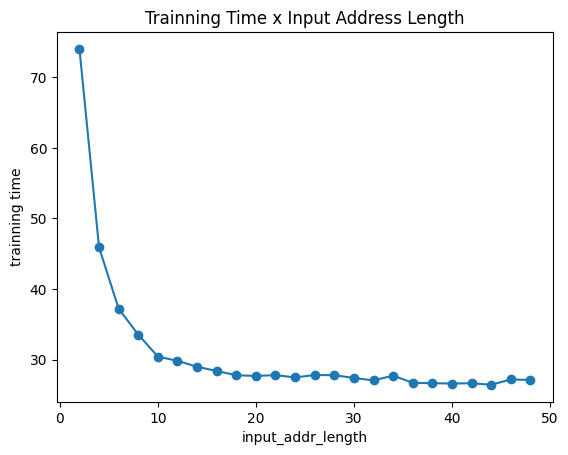

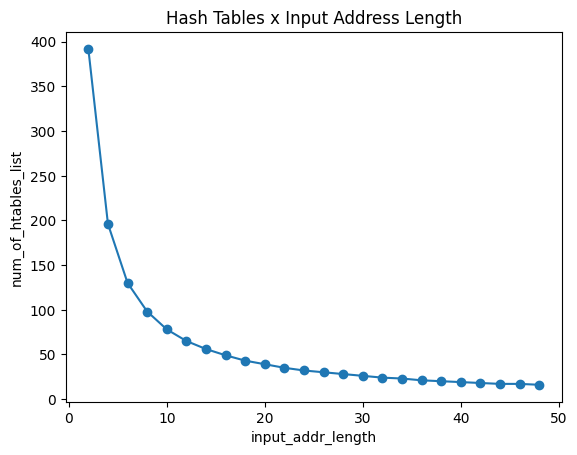

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2             392    0.0914       74.020864
                 4             196    0.1583       45.885210
                 6             130    0.3217       37.204040
                 8              98    0.5931       33.535864
                10              78    0.7075       30.423041
                12              65    0.7623       29.821135
                14              56    0.8433       28.984132
                16              49    0.8864       28.384634
                18              43    0.9011       27.791918
                20              39    0.9103       27.679652
                22              35    0.8998       27.802154
                24              32    0.9025       27.467510
                26              30    0.8887       27.821708
                28              28    0.8778       27.787609
                30              26    0.8581       27.393196
                32      

In [23]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))